# Diversity of Ideas: UC Davis


## Setup


In [1]:
from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv())

True

In [2]:
import pandas as pd
from util.ouraws import (
    getFromFile
)

In [3]:
%pwd

'c:\\Users\\theod\\OneDrive\\dev\\diversity-ideas\\notebooks\\2024'

In [4]:
df = getFromFile("../../data/ucdavis-opinions.parquet", False)
df.shape


(5324, 6)

In [5]:
df.iloc[0:20]

,title,url,body,year,month,day
0,Davis Joint Unified School District joins coho...,https://theaggie.org/2024/12/10/davis-joint-un...,Davis Joint Unified School District joins coho...,2024,12,1
1,What is the Pour Out Pepsi project?,https://theaggie.org/2024/12/09/what-is-the-po...,What is the Pour Out Pepsi project?\nThe proje...,2024,12,1
2,City of Davis unveils new artwork in memory of...,https://theaggie.org/2024/12/10/city-of-davis-...,City of Davis unveils new artwork in memory of...,2024,12,1
3,The Mondavi Center holds performance of Astria...,https://theaggie.org/2024/11/22/the-mondavi-ce...,The Mondavi Center holds performance of Astria...,2024,11,1
4,ASUCD Coffee House introduces halal menu optio...,https://theaggie.org/2024/12/06/asucd-coffee-h...,ASUCD Coffee House introduces halal menu optio...,2024,12,1
5,Davis Media Access produces local election cov...,https://theaggie.org/2024/12/10/davis-media-ac...,Davis Media Access produces local election cov...,2024,12,1
6,"Sugar, spice and holiday spirit",https://theaggie.org/2024/12/11/sugar-spice-an...,"Sugar, spice and holiday spirit\nA gourmet gif...",2024,12,1
7,Why I love the musical âHadestownâ,https://theaggie.org/2024/12/10/why-i-love-the...,Why I love the musical âHadestownâ\nThe be...,2024,12,1
8,ASUCD HAUS hosts Housing Fair on Nov. 13,https://theaggie.org/2024/12/05/asucd-haus-hos...,ASUCD HAUS hosts Housing Fair on Nov. 13\nThe ...,2024,12,1
9,Downtown Davis hosts 2nd Friday ArtAbout,https://theaggie.org/2024/12/10/downtown-davis...,Downtown Davis hosts 2nd Friday ArtAbout\nPenc...,2024,12,1


In [6]:
df[df.year==2024].count()

title    232
url      232
body     232
year     232
month    232
day      232
dtype: int64

In [7]:
df[df.year==2023].count()

title    240
url      240
body     240
year     240
month    240
day      240
dtype: int64

In [8]:
unique_urls = df.url.unique()

In [9]:
unique_urls.shape

(5324,)

In [10]:
unique_urls[0:20]

array(['https://theaggie.org/2024/12/10/davis-joint-unified-school-district-joins-cohort-to-address-housing-affordability-for-educators/',
       'https://theaggie.org/2024/12/09/what-is-the-pour-out-pepsi-project/',
       'https://theaggie.org/2024/12/10/city-of-davis-unveils-new-artwork-in-memory-of-uc-davis-student-karim-abou-najm/',
       'https://theaggie.org/2024/11/22/the-mondavi-center-holds-performance-of-astria-suparaks-asian-futures-without-asians/',
       'https://theaggie.org/2024/12/06/asucd-coffee-house-introduces-halal-menu-options-increasing-accessibility/',
       'https://theaggie.org/2024/12/10/davis-media-access-produces-local-election-coverage-throughout-election-night/',
       'https://theaggie.org/2024/12/11/sugar-spice-and-holiday-spirit/',
       'https://theaggie.org/2024/12/10/why-i-love-the-musical-hadestown/',
       'https://theaggie.org/2024/12/05/asucd-haus-hosts-housing-fair-on-nov-13/',
       'https://theaggie.org/2024/12/10/downtown-davis-hosts-

## Function Definitions


In [11]:
import numpy as np
import re

In [12]:
def getCovDispersion(wv):
    N = len(wv)
    cov = np.cov(wv)
    return (N, 
            np.trace(cov)/N, 
            np.linalg.norm(cov, ord=1)/N, 
            np.linalg.norm(cov, ord=2)/N, 
            np.linalg.norm(cov, ord=np.inf)/N, 
            )

def cosine_distance(v1, v2):
    """Calculate the cosine distance between two numpy arrays.
    
    Parameters:
    a (numpy array): First input array.
    b (numpy array): Second input array.
    
    Returns:
    float: Cosine distance between a and b.
    """
    a = np.array(v1, dtype=np.float64)
    b = np.array(v2, dtype=np.float64)
    # Calculate dot product and magnitudes of the input arrays
    dot   = np.dot(a, b)
    a_mag = np.linalg.norm(a)
    b_mag = np.linalg.norm(b)
    
    if np.isclose(a_mag, 0, rtol=1e-9, atol=1e-12):
        print(f"a_mag is very small: {a_mag}")
    if np.isclose(b_mag, 0, rtol=1e-9, atol=1e-12):
        print(f"b_mag is very small: {b_mag}")
    
    # Calculate and return the cosine distance
    return 1.0 - (dot / (a_mag * b_mag))

def getPairwiseDispersion(wv, measure):
    if len(wv) <= 1: return 0.0
    distance = 0.0
    vec = wv[0]
    for v in wv[1:]:
        distance += measure(vec, v)
        # print(f"\tcos_distance: {measure(vec, v)}")
    return distance + getPairwiseDispersion(wv[1:], measure)

def getNormalizedPairwiseDispersion(wv, measure):
    '''Normalize the dispersion by (N-Choose-2) number of pairs'''
    N = len(wv)
    return getPairwiseDispersion(wv, measure) / (N * (N-1)/2.)

In [13]:
diversity_words = [
    'diversity', 
    'equity',
    'inclusion',
    'inclusive',
    'inclusivity',
    'equality', 
    'equal opportunity',
    'social justice',
    'racial justice', 
    'multi-cultural', 
    'multicultural',
    'intercultural',
    'intersectional',
    'intersectionality',
    'anti-discrimination'
]

In [14]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\theod\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [15]:
diversity_lemmas = [lemmatizer.lemmatize(w) for w in diversity_words]
diversity_lemmas

['diversity',
 'equity',
 'inclusion',
 'inclusive',
 'inclusivity',
 'equality',
 'equal opportunity',
 'social justice',
 'racial justice',
 'multi-cultural',
 'multicultural',
 'intercultural',
 'intersectional',
 'intersectionality',
 'anti-discrimination']

In [16]:
diversity_pattern = "|".join(diversity_lemmas)

Let's verify how the "count" of diversity words in the text is calculated.


In [17]:
text = "This is a multicultural organization that advocates for diversity and racial justice."
len(re.findall(diversity_pattern, text))

3

## Analysis


In [18]:
from openai import OpenAI
from typing import List
import numpy as np
client = OpenAI()

In [19]:
def get_embedding(text: str) -> List[float]:
    """
    Get embeddings for a single text using text-embedding-3-large model.
    
    Args:
        text (str): The input text to generate embeddings for
        
    Returns:
        List[float]: The embedding vector
    """
    response = client.embeddings.create(
        model="text-embedding-3-large",
        input=text,
        dimensions=1024  # Optional: You can specify 256, 512, or 1024 dimensions
    )
    return response.data[0].embedding

def get_batch_embeddings(texts: List[str]) -> List[List[float]]:
    """
    Get embeddings for multiple texts in a single API call.
    
    Args:
        texts (List[str]): List of input texts to generate embeddings for
        
    Returns:
        List[List[float]]: List of embedding vectors
    """
    response = client.embeddings.create(
        model="text-embedding-3-large",
        input=texts,
        dimensions=1024
    )
    return [item.embedding for item in response.data]

In [20]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\theod\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
english_stopwords = stopwords.words('english')
def prepText(text_series):
    # Step 1: Clean and normalize each text in the series
    # - Convert to lowercase
    # - Lemmatize each word (convert to base form)
    # - Remove stopwords
    # - Join words back together with spaces
    text_series = text_series.apply(
        lambda x: " ".join(lemmatizer.lemmatize(w.lower()) for w in x.split()
                           if w not in english_stopwords))
    
    # Step 2: Filter out short texts
    # Remove any text less than 100 characters as they're likely too short for meaningful analysis
    text_series = text_series.apply(lambda x: x if len(x) > 100 else None)
    
    # Step 3: Remove any null values created by the previous step
    text_series = text_series.dropna()
    
    # Step 4: Count diversity-related terms
    # Sum up all instances of diversity-related words (defined in diversity_pattern)
    # across all remaining texts in the series
    total_diversity_words = sum([len(re.findall(diversity_pattern, text))
                                for text in text_series])
    
    # Return both the cleaned text series and the total count of diversity words
    return text_series, total_diversity_words

In [22]:
START_YEAR = 2009
FINAL_YEAR = 2024

In [23]:
year_2024 = df[df.year==2024]
clean_df, num_diversity_words = prepText(year_2024.body)
wv = get_batch_embeddings(clean_df)

In [24]:
type(wv[0])

list

In [25]:
docmatrix = np.array(wv)

In [26]:
docmatrix.shape

(232, 1024)

In [27]:
pairwise = getNormalizedPairwiseDispersion(docmatrix, cosine_distance)
cov = getCovDispersion(docmatrix)
print(f"{year_2024.year}, {cov[0]}, {cov[1]}, {pairwise}")

0      2024
1      2024
2      2024
3      2024
4      2024
       ... 
227    2024
228    2024
229    2024
230    2024
231    2024
Name: year, Length: 232, dtype: int64, 232, 0.000976894210441257, 0.6486560972025281


In [28]:
pairwise

0.6486560972025281

In [29]:
results = []
for year in range(START_YEAR, FINAL_YEAR+1):
    year_df = df[df.year==year]
    
    clean_df, num_diversity_words = prepText(year_df.body)
    wv = get_batch_embeddings(clean_df)
    
    docmatrix = np.array(wv)
    pairwise = getNormalizedPairwiseDispersion(docmatrix, cosine_distance)
    cov = getCovDispersion(docmatrix)
    
    print(f"{year}, {cov[0]}, {cov[1]}, {pairwise}")
    
    result = {'year':     year,
              'pairwise': pairwise,
              'size':     cov[0],
              'trace':    cov[1],
              'norm-1':   cov[2],
              'norm-2':   cov[3],
              'norm-inf': cov[4],
              'diversity-words': num_diversity_words,
              'mentions-norm'  : num_diversity_words/cov[0]
             }
    results.append(result)

2009, 458, 0.0009768443529627243, 0.6070616958768729
2010, 470, 0.000976853087576591, 0.5915219806916443
2011, 479, 0.0009768765777603435, 0.5969634863905527
2012, 452, 0.00097686337410472, 0.6130241152678163
2013, 323, 0.0009768474622633605, 0.639622651004742
2014, 181, 0.0009768884663833655, 0.6219145186139535
2015, 180, 0.0009768908286954987, 0.6277489696520909
2016, 264, 0.00097679675534449, 0.6307398217603954
2017, 365, 0.00097688506414187, 0.6082019050949786
2018, 358, 0.000976872221416219, 0.6222863885442477
2019, 276, 0.0009768782034478445, 0.6440873275583867
2020, 277, 0.0009767294246026783, 0.6211777648671156
2021, 187, 0.00097681673734334, 0.6374513126321839
2022, 186, 0.0009769155640166505, 0.6080544562928992
2023, 238, 0.0009769670704864954, 0.6341334496379402
2024, 232, 0.0009768948425416973, 0.648685921659957


In [30]:
results_df = pd.DataFrame.from_records(results)
results_df.set_index('year')

,pairwise,size,trace,norm-1,norm-2,norm-inf,diversity-words,mentions-norm
year,,,,,,,,
2009,0.607062,458,0.000977,0.000495,0.000391,0.000495,47,0.102620
2010,0.591522,470,0.000977,0.000501,0.000405,0.000501,53,0.112766
2011,0.596963,479,0.000977,0.000503,0.000399,0.000503,66,0.137787
2012,0.613024,452,0.000977,0.000488,0.000384,0.000488,87,0.192478
2013,0.639623,323,0.000977,0.000471,0.000360,0.000471,39,0.120743
2014,0.621915,181,0.000977,0.000467,0.000378,0.000467,45,0.248619
2015,0.627749,180,0.000977,0.000461,0.000372,0.000461,86,0.477778
2016,0.630740,264,0.000977,0.000450,0.000369,0.000450,70,0.265152
2017,0.608202,365,0.000977,0.000501,0.000390,0.000501,113,0.309589


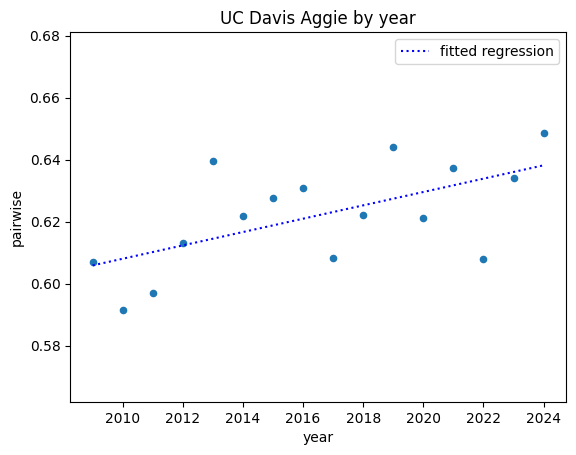

In [31]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

x = results_df['year']
y = results_df['pairwise']

slope, intercept, r_value, p_value, std_err = linregress(x, y)

results_df.plot(x="year", y="pairwise", kind="scatter")

plt.plot(x, intercept + slope*x, 'b:', label='fitted regression')

plt.title("UC Davis Aggie by year")
plt.legend(loc='upper right')
plt.ylim(min(y)*0.95, max(y)*1.05)
plt.show()

mentions-norm slope:0.01234, int:0.16286, r:0.41960, p:0.10567, se:0.00713, x:range(0, 16)
pairwise slope:0.00215, int:0.60591, r:0.60845, p:0.01238, se:0.00075, x:range(0, 16)


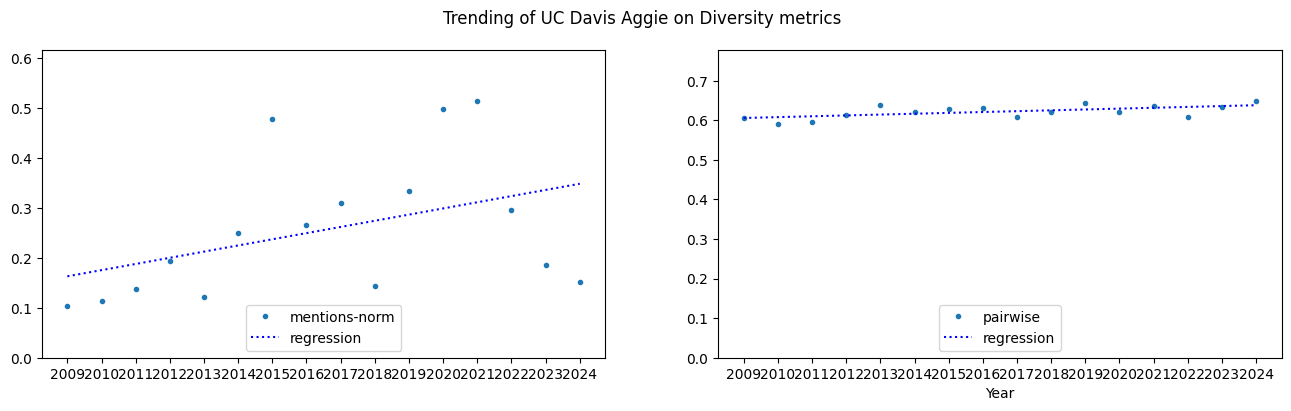

In [32]:
# Select the columns to plot
columns = ["mentions-norm", "pairwise"]

# Create a figure with subplots
fig, axs = plt.subplots(nrows=1, ncols=len(columns), sharex=True, figsize=(16,4))

# Loop through the columns and plot each one
for ax, column in zip(axs, columns):
    # Select the data for the current column
    x = range(len(results_df.index))
    y = results_df[column]
     
    # Calculate the linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    
    print("{} slope:{:.5f}, int:{:.5f}, r:{:.5f}, p:{:.5f}, se:{:.5f}, x:{}".format(
            column, slope, intercept, r_value, p_value, std_err, x))

    # Plot the data and the linear regression line
    results_df[column].plot(ax=ax, style=".", x=x, y=y, label=column)
    ax.plot(x, intercept + slope*x, 'b:', label='regression')
    ax.set_ylim(0, max(y)*1.2)
    
    # Add a legend
    ax.legend(loc='lower center')

    # Add x-label for the years
    ax.set_xticks(results_df.index)
    ax.set_xticklabels(results_df.year)
 
    # Add a title
    # ax.set_title(f"Trending of {column} in Liberty University's Champion")
    
plt.xlabel("Year")
plt.suptitle("Trending of UC Davis Aggie on Diversity metrics")
plt.show()